# Chayanin Kongsareekul 6532035021

# Assignment 04

# Exercise 1.

1. (Cryptanalysis) Though encryption is primarily designed to preserve confidentiality
and integrity of data, the mechanism itself is vulnerable to brute force (statistical
analysis). In other words, the more we see the encrypted data, the easier we can
hack it. In this exercise, you are asked to crack the following cipher text. Please
provide the decrypted result and explain your strategy in decrypting this text.

## Cipher text
PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU
BROJZK MOLTROE.

In [44]:
cipher_text = "PRCSOFQX FP QDR AFOPQ CZSPR LA JFPALOQSKR. QDFP FP ZK LIU BROJZK MOLTROE."

## a. Count the frequency of letters. List the top three most frequent characters.

In [45]:
d = {
    c: cipher_text.count(c) for c in set(cipher_text) if c.isalpha()
}
d = dict(sorted(d.items(), key=lambda item: item[1], reverse=True)[:3])

print(d)

{'P': 7, 'O': 6, 'F': 6}


### <span style="color: red;">Answer (a.): The top three most frequent characters are 'F' (6), 'P' (5), and 'R' (4)</span>

## b. Knowing that this is English, what are commonly used three-letter words and two-letter words. Does the knowledge give you a hint on cracking the given text?

In [46]:
two_letter_words = [
    'IS',
    'TO',
    'OF',
    'IN',
    'IF',
    'ON',
    'UP',
    'NO',
    'DO',
    'OR',
    'AS',
    'AT',
    'AN',
    'AM',
    'BE',
    'HE',
    'SO',
    'HI'
]

three_letter_words = [
    'AND',
    'THE',
    'YOU',
    'ARE',
    'BUT',
    'FOR',
    'NOT',
    'NOW',
    'ONE',
    'OUT',
    'SHE',
    'HIM',
    'HIS',
    'CAN',
    'HAD',
    'HAS',
    'HOW',
    'WAS',
    'WHO',
    'ALL',
    'ANY',
    'NEW',
    'OLD',
    'BIG',
    'BAD',
    'DAY',
    'GET',
    'NEW',
    'MAN',
    'CAT',
    'DOG',
    'SUN',
    'HAT'
]

### <span style="color: red;">Answer (b.): Commonly used </span>
#### <span style="color: red;">two-letter words: 'IS', 'TO', 'OF', 'IN', 'IF', 'ON', 'UP', 'NO', 'DO', 'OR', 'AS', 'AT', 'AN', 'AM', 'BE', 'HE', 'SO', 'HI'</span>
#### <span style="color: red;">three-letter words: 'AND', 'THE', 'YOU', 'ARE', 'BUT', 'FOR', 'NOT', 'NOW', 'ONE', 'OUT', 'SHE', 'HIM', 'HIS', 'CAN', 'HAD', 'HAS', 'HOW', 'WAS', 'WHO', 'ALL', 'ANY', 'NEW', 'OLD', 'BIG', 'BAD', 'DAY', 'GET', 'NEW', 'MAN', 'CAT', 'DOG', 'SUN', 'HAT'</span>

#### <span style="color: red;">Yes, the knowledge gives a hint on cracking the given text. </span>

## c. Cracking the given text. Measure the time that you have taken to crack this message.


### <span style="color: red;">Answer (c.): SECURITY IS THE FIRST CAUSE OF MISFORTUNE. THIS IS AN OLD GERMAN PROVERB.</span>
#### <span style="color: red;">This take me about 11 hours to crack the code.</span>

## d. Create a simple python program for cracking the Caesar cipher text using brute force attack. Explain the design and demonstrate your software. (You may use an English dictionary for validating results.)

### <span style="color: red;">Answer (d.): The following Python Code Below. Explain in comments.</span>

In [47]:
# Extract set of two-letter and three-letter tokens from the cipher text
two_letter_tokens = set([w for w in cipher_text.split() if len(w) == 2])
three_letter_tokens = set([w for w in cipher_text.split() if len(w) == 3])

print(two_letter_tokens)
print(three_letter_tokens)

{'LA', 'ZK', 'FP'}
{'QDR', 'LIU'}


In [48]:
# Create an underscore version of the cipher text for pattern matching
underscore_string = ''.join(['_' if c.isalpha() else c for c in cipher_text])
print(underscore_string)

# function to change the mapping dictionary
def change_string(d, old_string, new_string):
    if len(set(old_string)) != len(set(new_string)):
        return None
    new_dict = {o: n for o, n in zip(old_string, new_string)}
    for k in new_dict:
        if k in d and d[k] != new_dict[k]:
            return None   
    for k in new_dict:
        d[k] = new_dict[k]
    return d

________ __ ___ _____ _____ __ __________. ____ __ __ ___ ______ _______.


#### Because "FP" appears in the second position of both sentences, it's likely to be "IS" or "AM".
#### Since "AM" can only be used with "I", "FP" is likely to be "IS".

In [49]:
# Try to map "FP" -> "IS" and "QDR" -> each three-letter word

file_data = ''
cnt = 0

for i in range(len(three_letter_words)):
    text = underscore_string
    d = {}
    d = change_string(d, 'FP', 'IS')
    if not d:
        continue
    d = change_string(d, 'QDR', three_letter_words[i])
    if not d:
        continue
    for it in range(len(text)):
        if cipher_text[it] in d:
            text = text[:it] + d[cipher_text[it]] + text[it+1:]
    cnt += 1
    file_data += text + '\n'

with open('output.txt', 'w') as f:
    lines = file_data.splitlines()
    for i, line in enumerate(lines[:5]):
        print(f"{i}\t{line}")
    print('...')
    for i, line in enumerate(lines[-5:]):
        print(f"{i + (len(lines) - 5) + 1}\t{line}")
    f.write(file_data)

0	SD___IA_ IS AND _I_SA ___SD __ _IS___A__D. ANIS IS __ ___ _D____ ____D__.
1	SE___IT_ IS THE _I_ST ___SE __ _IS___T__E. THIS IS __ ___ _E____ ____E__.
2	SU___IY_ IS YOU _I_SY ___SU __ _IS___Y__U. YOIS IS __ ___ _U____ ____U__.
3	SE___IA_ IS ARE _I_SA ___SE __ _IS___A__E. ARIS IS __ ___ _E____ ____E__.
4	ST___IB_ IS BUT _I_SB ___ST __ _IS___B__T. BUIS IS __ ___ _T____ ____T__.
...
28	SN___IM_ IS MAN _I_SM ___SN __ _IS___M__N. MAIS IS __ ___ _N____ ____N__.
29	ST___IC_ IS CAT _I_SC ___ST __ _IS___C__T. CAIS IS __ ___ _T____ ____T__.
30	SG___ID_ IS DOG _I_SD ___SG __ _IS___D__G. DOIS IS __ ___ _G____ ____G__.
31	SN___IS_ IS SUN _I_SS ___SN __ _IS___S__N. SUIS IS __ ___ _N____ ____N__.
32	ST___IH_ IS HAT _I_SH ___ST __ _IS___H__T. HAIS IS __ ___ _T____ ____T__.


In [50]:
# Filter out grammatically incorrect results

cipher_results = [
    # "SD___IA_ IS AND _I_SA ___SD __ _IS___A__D. ANIS IS __ ___ _D____ ____D__.",
    "SE___IT_ IS THE _I_ST ___SE __ _IS___T__E. THIS IS __ ___ _E____ ____E__.",
    # "SU___IY_ IS YOU _I_SY ___SU __ _IS___Y__U. YOIS IS __ ___ _U____ ____U__.",
    # "SE___IA_ IS ARE _I_SA ___SE __ _IS___A__E. ARIS IS __ ___ _E____ ____E__.",
    # "ST___IB_ IS BUT _I_SB ___ST __ _IS___B__T. BUIS IS __ ___ _T____ ____T__.",
    # ...,
    # "SN___IM_ IS MAN _I_SM ___SN __ _IS___M__N. MAIS IS __ ___ _N____ ____N__.",
    # "ST___IC_ IS CAT _I_SC ___ST __ _IS___C__T. CAIS IS __ ___ _T____ ____T__.",
    # "SG___ID_ IS DOG _I_SD ___SG __ _IS___D__G. DOIS IS __ ___ _G____ ____G__.",
    # "SN___IS_ IS SUN _I_SS ___SN __ _IS___S__N. SUIS IS __ ___ _N____ ____N__.",
    # "ST___IH_ IS HAT _I_SH ___ST __ _IS___H__T. HAIS IS __ ___ _T____ ____T__."
]


#### Try the other 2 possible two_letter_words and 1 possible three_letter_word.

In [51]:
two_letter_words = [
    # 'IS',
    'TO',
    'OF',
    'IN',
    'IF',
    'ON',
    'UP',
    'NO',
    'DO',
    'OR',
    'AS',
    'AT',
    'AN',
    'AM',
    'BE',
    'HE',
    'SO',
    'HI'
]

two_letter_words_after_IS = [
    'TO',
    # 'OF',
    'IN',
    # 'IF',
    'ON',
    'UP',
    'NO',
    # 'DO',
    # 'OR',
    # 'AS',
    'AT',
    'AN',
    # 'AM',
    # 'BE',
    # 'HE',
    'SO',
    # 'HI'
]

file_data = ''
cnt = 0
for i in range(len(two_letter_words)):
    for j in range(len(three_letter_words)):
        for k in range(len(two_letter_words_after_IS)):
            if two_letter_words[i] == two_letter_words_after_IS[k]:
                continue
            text = underscore_string
            for last_result in cipher_results:
                d = {}
                for it in range(len(cipher_text)):
                    if last_result[it].isalpha():
                        d[cipher_text[it]] = last_result[it]
                d = change_string(d, 'LA', two_letter_words[i])
                if not d:
                    continue
                d = change_string(d, 'LIU', three_letter_words[j])
                if not d:
                    continue
                d = change_string(d, 'ZK', two_letter_words_after_IS[k])
                if not d:
                    continue
                for it in range(len(text)):
                    if cipher_text[it] in d:
                        text = text[:it] + d[cipher_text[it]] + text[it+1:]
                cnt += 1
                file_data += text + '\n'
with open('output.txt', 'w') as f:
    lines = file_data.splitlines()
    for i, line in enumerate(lines[:5]):
        print(f"{i}\t{line}")
    print('...')
    for i, line in enumerate(lines[-5:]):
        print(f"{i + (len(lines) - 5) + 1}\t{line}")
    f.write(file_data)

0	SE___IT_ IS THE OI_ST _I_SE TO _ISOT_T_NE. THIS IS IN THE _E__IN __T_E__.
1	SE___IT_ IS THE OI_ST _O_SE TO _ISOT_T_NE. THIS IS ON THE _E__ON __T_E__.
2	SE___IT_ IS THE OI_ST _U_SE TO _ISOT_T_PE. THIS IS UP THE _E__UP __T_E__.
3	SE___IT_ IS THE OI_ST _N_SE TO _ISOT_T_OE. THIS IS NO THE _E__NO __T_E__.
4	SE___IT_ IS THE OI_ST _A_SE TO _ISOT_T_TE. THIS IS AT THE _E__AT __T_E__.
...
340	SE___IT_ IS THE II_ST _U_SE HI _ISIH_T_PE. THIS IS UP HAT _E__UP __H_E__.
341	SE___IT_ IS THE II_ST _N_SE HI _ISIH_T_OE. THIS IS NO HAT _E__NO __H_E__.
342	SE___IT_ IS THE II_ST _A_SE HI _ISIH_T_TE. THIS IS AT HAT _E__AT __H_E__.
343	SE___IT_ IS THE II_ST _A_SE HI _ISIH_T_NE. THIS IS AN HAT _E__AN __H_E__.
344	SE___IT_ IS THE II_ST _S_SE HI _ISIH_T_OE. THIS IS SO HAT _E__SO __H_E__.


#### Filter out the impossible fourth word.

In [52]:
with open('output.txt', 'r') as f:
    lines = f.readlines()
    s = set()
    for line in lines:
        line = line.split()
        s.add(line[3])
    for line in s:
        print(line)
    print(len(s))


SI_ST
TI_ST
OI_ST
NI_ST
MI_ST
EI_ST
FI_ST
RI_ST
II_ST
9


In [53]:
possible_fourth_word = [
    'TI_ST', # TIEST
    'MI_ST', # MIDST
    'FI_ST', # FIRST
]

with open('output.txt', 'r') as f:
    lines = f.readlines()
    final_results = []
    for line in lines:
        line = line.split()
        if line[3] in possible_fourth_word:
            final_results.append(' '.join(line))
    # for line in final_results:
    #     print(line)
    # print(len(final_results))
    with open('output2.txt', 'w') as f2:
        lines = final_results
        for i, line in enumerate(lines[:5]):
            print(f"{i}\t{line}")
        print('...')
        for i, line in enumerate(lines[-5:]):
            print(f"{i + (len(lines) - 5) + 1}\t{line}")
        f2.write('\n'.join(final_results))

0	SE___IT_ IS THE FI_ST _T_SE OF _ISFO_T_OE. THIS IS TO ONE _E__TO __O_E__.
1	SE___IT_ IS THE FI_ST _I_SE OF _ISFO_T_NE. THIS IS IN ONE _E__IN __O_E__.
2	SE___IT_ IS THE FI_ST _O_SE OF _ISFO_T_NE. THIS IS ON ONE _E__ON __O_E__.
3	SE___IT_ IS THE FI_ST _U_SE OF _ISFO_T_PE. THIS IS UP ONE _E__UP __O_E__.
4	SE___IT_ IS THE FI_ST _N_SE OF _ISFO_T_OE. THIS IS NO ONE _E__NO __O_E__.
...
65	SE___IT_ IS THE MI_ST _U_SE AM _ISMA_T_PE. THIS IS UP ANY _E__UP __A_E__.
66	SE___IT_ IS THE MI_ST _N_SE AM _ISMA_T_OE. THIS IS NO ANY _E__NO __A_E__.
67	SE___IT_ IS THE MI_ST _A_SE AM _ISMA_T_TE. THIS IS AT ANY _E__AT __A_E__.
68	SE___IT_ IS THE MI_ST _A_SE AM _ISMA_T_NE. THIS IS AN ANY _E__AN __A_E__.
69	SE___IT_ IS THE MI_ST _S_SE AM _ISMA_T_OE. THIS IS SO ANY _E__SO __A_E__.


In [54]:
with open('output2.txt', 'r') as f:
    lines = f.readlines()
    s = set()
    for line in lines:
        line = line.split()
        s.add(' '.join(line[7:11]))
    # for line in s:
    #     print(line)
    # print(len(s))
    with open('output3.txt', 'w') as f2:
        lines = list(s)
        for i, line in enumerate(lines[:5]):
            print(f"{i}\t{line}")
        print('...')
        for i, line in enumerate(lines[-5:]):
            print(f"{i + (len(lines) - 5) + 1}\t{line}")
        f2.write('\n'.join(s))


0	THIS IS IN OUT
1	THIS IS ON OLD
2	THIS IS ON AND
3	THIS IS UP ANY
4	THIS IS AN OLD
...
44	THIS IS AN AND
45	THIS IS UP ONE
46	THIS IS UP OLD
47	THIS IS AN ARE
48	THIS IS AT ARE


#### Filter possible phrases "THIS IS x x"

In [55]:
possible_phrase = [
    # "THIS IS UP ANY",
    "THIS IS IN ONE",
    "THIS IS TO ONE",
    # "THIS IS UP OLD",
    "THIS IS AT OLD",
    # "THIS IS NO OUT",
    "THIS IS NO ONE",
    # "THIS IS NO ANY",
    "THIS IS AT ANY",
    # "THIS IS IN OLD",
    # "THIS IS IN ARE",
    # "THIS IS ON OUT",
    # "THIS IS ON AND",
    # "THIS IS AN OUT",
    # "THIS IS AT ARE",
    # "THIS IS ON ARE",
    # "THIS IS UP ONE",
    # "THIS IS SO AND",
    # "THIS IS SO ANY",
    "THIS IS ON ONE",
    # "THIS IS NO ARE",
    # "THIS IS ON OLD",
    # "THIS IS SO OUT",
    # "THIS IS AN ARE",
    "THIS IS IN ANY",
    "THIS IS AN OLD",
    "THIS IS UP AND",
    # "THIS IS TO AND",
    # "THIS IS IN OUT",
    # "THIS IS SO ONE",
    "THIS IS AT ONE",
    # "THIS IS TO OLD",
    # "THIS IS UP OUT",
    # "THIS IS NO OLD",
    # "THIS IS NO AND",
    # "THIS IS UP ARE",
    "THIS IS ON ANY",
    # "THIS IS AN ONE",
    # "THIS IS AN ANY",
    # "THIS IS AN AND",
    # "THIS IS TO OUT",
    # "THIS IS AT AND",
    "THIS IS TO ANY",
    # "THIS IS TO ARE",
    # "THIS IS IN AND",
    "THIS IS SO OLD",
    # "THIS IS AT OUT",
    # "THIS IS SO ARE"
]

#### Try search every 7th word in the dictionary, only MISFORTUNE is the only word that is possible.

In [56]:
with open('output2.txt', 'r') as f:
    lines = f.readlines()
    final_results = []
    for line in lines:
        line = line.split()
        phrase = ' '.join(line[7:11])
        if phrase in possible_phrase:
            final_results.append(' '.join(line))
    for line in final_results:
        print(line)
    print(len(final_results))
    with open('output4.txt', 'w') as f2:
        f2.write('\n'.join(final_results))


    s2 = set()
    for line in final_results:
        s2.add(line.split()[6])
    for line in s2:
        print(line)

SE___IT_ IS THE FI_ST _T_SE OF _ISFO_T_OE. THIS IS TO ONE _E__TO __O_E__.
SE___IT_ IS THE FI_ST _I_SE OF _ISFO_T_NE. THIS IS IN ONE _E__IN __O_E__.
SE___IT_ IS THE FI_ST _O_SE OF _ISFO_T_NE. THIS IS ON ONE _E__ON __O_E__.
SE___IT_ IS THE FI_ST _N_SE OF _ISFO_T_OE. THIS IS NO ONE _E__NO __O_E__.
SE___IT_ IS THE FI_ST _A_SE OF _ISFO_T_TE. THIS IS AT ONE _E__AT __O_E__.
SE___IT_ IS THE FI_ST _A_SE OF _ISFO_T_TE. THIS IS AT OLD _E__AT __O_E__.
SE___IT_ IS THE FI_ST _A_SE OF _ISFO_T_NE. THIS IS AN OLD _E__AN __O_E__.
SE___IT_ IS THE FI_ST _S_SE OF _ISFO_T_OE. THIS IS SO OLD _E__SO __O_E__.
SE___IT_ IS THE TI_ST _U_SE AT _ISTA_T_PE. THIS IS UP AND _E__UP __A_E__.
SE___IT_ IS THE TI_ST _T_SE AT _ISTA_T_OE. THIS IS TO ANY _E__TO __A_E__.
SE___IT_ IS THE TI_ST _I_SE AT _ISTA_T_NE. THIS IS IN ANY _E__IN __A_E__.
SE___IT_ IS THE TI_ST _O_SE AT _ISTA_T_NE. THIS IS ON ANY _E__ON __A_E__.
SE___IT_ IS THE MI_ST _U_SE AM _ISMA_T_PE. THIS IS UP AND _E__UP __A_E__.
SE___IT_ IS THE MI_ST _T_SE AM _ISMA_T

In [57]:
possible_7th_word = "_ISFO_T_NE." #"MISFORTUNE."
# "JFPALOQSKR."
d = {
    'J': 'M',
    'O': 'R',
    'S': 'U',
}

with open('output4.txt', 'r') as f:
    lines = f.readlines()
    final_results = []
    for line in lines:
        line = line.split()
        if line[6] == possible_7th_word:
            string = ' '.join(line)
            for i in range(len(cipher_text)):
                if cipher_text[i] in d:
                    string = string[:i] + d[cipher_text[i]] + string[i+1:]
            final_results.append(string)
    for line in final_results:
        print(line)
    print(len(final_results))
    with open('output5.txt', 'w') as f2:
        f2.write('\n'.join(final_results))

SE_URIT_ IS THE FIRST _IUSE OF MISFORTUNE. THIS IS IN ONE _ERMIN _RO_ER_.
SE_URIT_ IS THE FIRST _OUSE OF MISFORTUNE. THIS IS ON ONE _ERMON _RO_ER_.
SE_URIT_ IS THE FIRST _AUSE OF MISFORTUNE. THIS IS AN OLD _ERMAN _RO_ER_.
3


In [58]:
# SE_URIT_ 
# SECURITY
# PRCSOFQX

# _ERMAN 
# GERMAN
# BROJZK

d = {
    'C': 'C',
    'X': 'Y',
    'B': 'G'
}

with open('output5.txt', 'r') as f:
    lines = f.readlines()
    final_results = []
    for line in lines:
        line = line.split()
        string = ' '.join(line)
        for i in range(len(cipher_text)):
            if cipher_text[i] in d:
                string = string[:i] + d[cipher_text[i]] + string[i+1:]
        final_results.append(string)
    for line in final_results:
        print(line)
    print(len(final_results))
    with open('final_output.txt', 'w') as f2:
        f2.write('\n'.join(final_results))



SECURITY IS THE FIRST CIUSE OF MISFORTUNE. THIS IS IN ONE GERMIN _RO_ER_.
SECURITY IS THE FIRST COUSE OF MISFORTUNE. THIS IS ON ONE GERMON _RO_ER_.
SECURITY IS THE FIRST CAUSE OF MISFORTUNE. THIS IS AN OLD GERMAN _RO_ER_.
3


#### Search Google

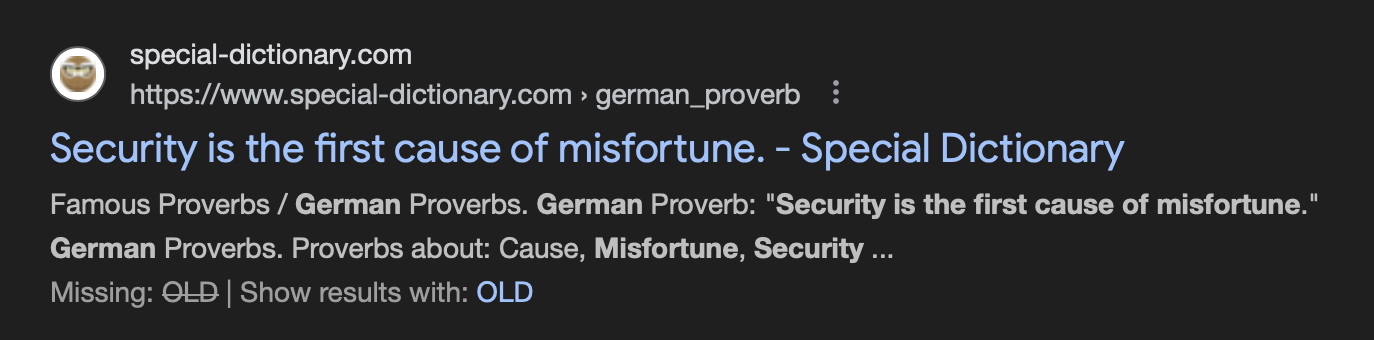

## <span style="color: red;">Ans: SECURITY IS THE FIRST CAUSE OF MISFORTUNE. THIS IS AN OLD GERMAN PROVERB.</span>

# Exercise 2. (Cryptanalysis on Symmetric Encryption) Vigenère is a complex version of the Caesar cipher. It is a polyalphabetic substitution.

## a. Please review Kasiski examination Explain how it can be used to attack Vigenère.

### <span style="color: red;">Answer (a.):<span style="color: red;">

**Kasiski Examination** ใช้ค้นหาความยาวของ key ของรหัส Vigenère
- เมื่อรู้ความยาวของ key แล้ว เราจะสามารถแยกปัญหาออกเป็นหลาย ๆ **Caesar cipher** ได้

**ขั้นตอนการใช้ Kasiski Examination**
1. ค้นหาลำดับอักษรซ้ำใน ciphertext
    - เช่น "ABC" ปรากฏที่ตำแหน่ง 5, 15, 25
2. คำนวณระยะห่างระหว่างตำแหน่งที่ซ้ำ
    - เช่น 15-5=10, 25-15=10
3. หา **ตัวหารร่วมมาก (GCD)** ของระยะห่างเหล่านั้น
    - เช่น GCD(10, 10) = 10
4. แบ่ง ciphertext ออกเป็นกลุ่มตามความยาวของ key ที่คำนวณได้
    - เช่น ถ้า GCD = 10, แบ่ง ciphertext ออกเป็น 10 กลุ่ม
5. วิเคราะห์ความถี่ของแต่ละกลุ่ม (Frequency Analysis)
    - ใช้การวิเคราะห์ความถี่ (เหมือนโจมตี Caesar cipher) กับแต่ละกลุ่มเพื่อหาตัวอักษรกุญแจในแต่ละตำแหน่ง
    - รวมผลลัพธ์ทั้งหมด → ได้กุญแจเต็ม → ถอดรหัสข้อความ

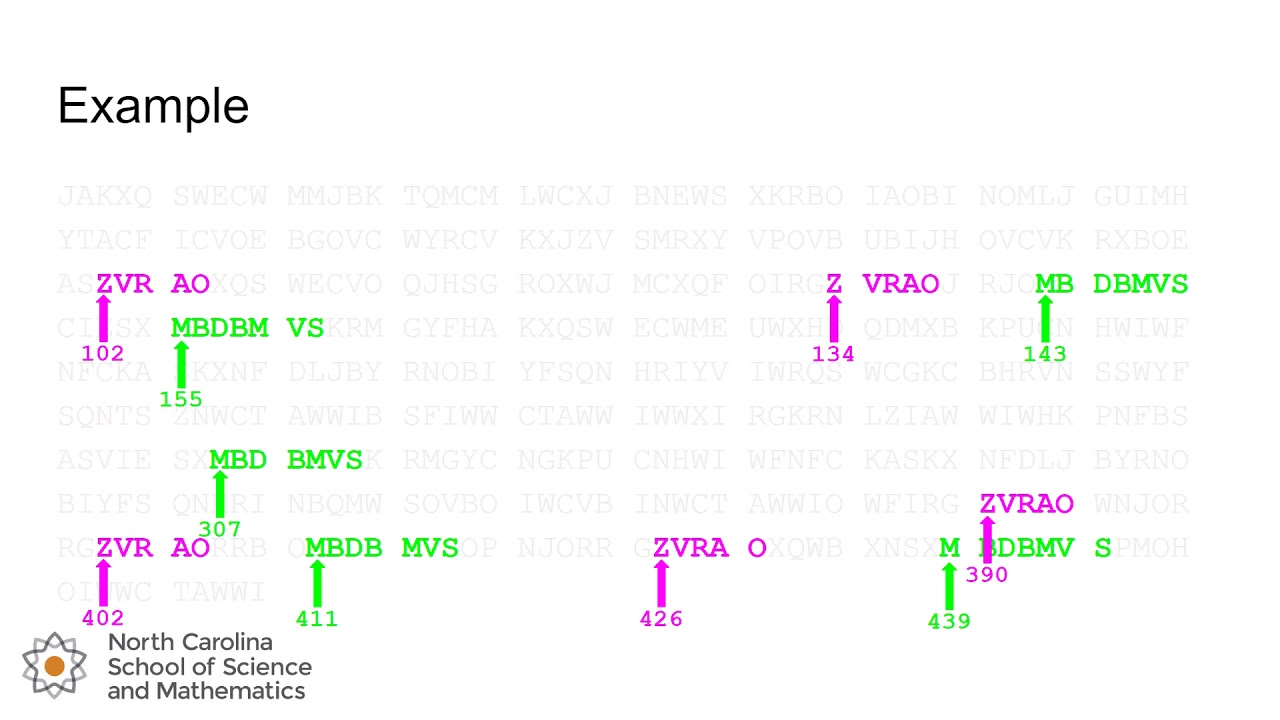



# Exercise 3.

3. (Mode in Block Cipher) Block Cipher is designed to have more randomness in a
block. However, an individual block still utilizes the same key. Thus, it is
recommended to use a cipher mode with an initial vector, chaining or feedback
between blocks. This exercise will show you the weakness of Electronic Code Book
mode which does not include any initial vector, chaining or feedback.

## a. Find a bitmap image that is larger than 2000x2000 pixels. Note that you may resize any image. To simplify the pattern, we will change it to bitmap (1-bit per pixel) using the portable bitmap format (pbm). In this example, we will use imagemagick for the conversion.

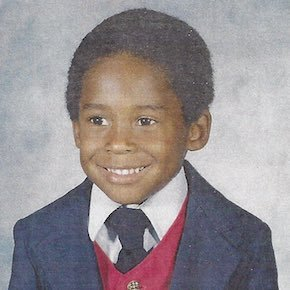

## b. c. d. e.

Creating encrypted files with different modes...
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
*** WARNING : deprecated key derivation used.
Using -iter or -pbkdf2 would be better.
Encryption completed!
Headers added to encrypted files!


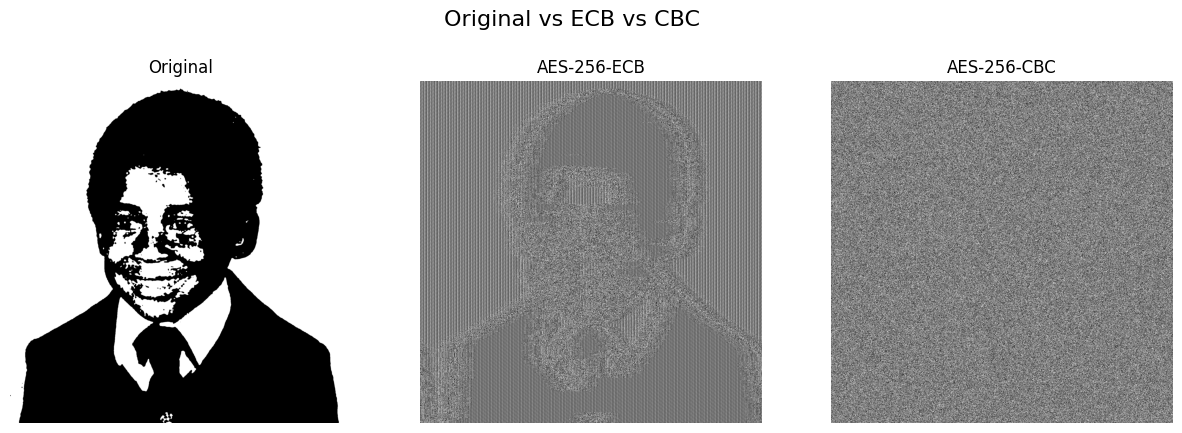

In [59]:
# Block Cipher Mode Comparison
# Demonstrating the weakness of ECB mode vs other cipher modes

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

# Use ImageMagick to convert and resize an image to PBM format
!magick image.jpg -resize 2000x2000 org.pbm

# Copy org.pbm to org.x for encryption (removing header)
!cp org.pbm org.x

#  Create different cipher modes
print("Creating encrypted files with different modes...")

# ECB mode (Electronic Code Book)
!openssl enc -aes-256-ecb -in org.x -nosalt -out enc_ecb.x -pass pass:mypassword

# CBC mode (Cipher Block Chaining)
!openssl enc -aes-256-cbc -in org.x -nosalt -out enc_cbc.x -pass pass:mypassword

print("Encryption completed!")

# Add headers back to create valid PBM files
def add_pbm_header(input_file, output_file, width=2000, height=2000):
    """Add PBM header to encrypted file"""
    with open(input_file, 'rb') as f:
        data = f.read()
    
    header = f"P4\n{width} {height}\n".encode('ascii')
    
    with open(output_file, 'wb') as f:
        f.write(header)
        f.write(data)

# Add headers to all encrypted files
add_pbm_header('enc_ecb.x', 'enc_ecb.pbm')
add_pbm_header('enc_cbc.x', 'enc_cbc.pbm') 

print("Headers added to encrypted files!")

# Load and display images for comparison
def load_pbm_image(filename):
    """Load PBM image and convert to numpy array for display"""
    try:
        img = Image.open(filename)
        return np.array(img)
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None

# Load all images
original = load_pbm_image('org.pbm')
ecb_encrypted = load_pbm_image('enc_ecb.pbm')
cbc_encrypted = load_pbm_image('enc_cbc.pbm')

# Create comparison plot
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Original vs ECB vs CBC', fontsize=16)

# Plot original image if available
if original is not None:
    axes[0].imshow(original, cmap='gray')
    axes[0].set_title('Original')
    axes[0].axis('off')

# Plot ECB encrypted
if ecb_encrypted is not None:
    axes[1].imshow(ecb_encrypted, cmap='gray')
    axes[1].set_title('AES-256-ECB')
    axes[1].axis('off')

# Plot CBC encrypted  
if cbc_encrypted is not None:
    axes[2].imshow(cbc_encrypted, cmap='gray')
    axes[2].set_title('AES-256-CBC')
    axes[2].axis('off')

## f. What does the result suggest about the mode of operation in block cipher? Please provide your analysis.

### <span style="color: red;">Answer (3.f.):</span>

#### ECB
- encrypt(plaintext_block[i]) -> ciphertext_block[i]
- Identical plaintext blocks -> identical ciphertext blocks.
- In an image, the original pattern is still visible, like a mosaic.

#### CBC
- encrypt(plaintext_block[i] XOR ciphertext_block[i - 1]) -> ciphertext_block[i]
- Identical plaintext blocks -> different ciphertext blocks (due to chaining).
- Requires an initialization vector (IV) for the first block.
- In an image, the original pattern is destroyed, looks random.

#### Analysis
##### ECB mode is insecure for data with structure 
- Patterns in plaintext are visible in ciphertext.

##### CBC mode improves security by randomizing ciphertext
- Chaining ensures each block’s encryption depends on all previous blocks. Removes visible patterns.
- Still vulnerable to certain attacks

##### Conclusion
- The underlying block cipher (AES-256) is strong, but the mode of operation (ECB) is weak for structured data.
- Use CBC or other modes for better security.

# Exercise 4. (Encryption Protocol - Digital Signature)

## a. Measure the performance of a hash function (sha1), RC4, Blowfish and DSA. Outline your experimental design. (Please use OpenSSL for your measurement)

### <span style="color: red;">Answer (4.a.): Use `openssl speed` command to measure the performance of each algorithm.</span>

In [87]:
!openssl speed -provider legacy -provider default sha1

Doing sha1 ops for 3s on 16 size blocks: 20847777 sha1 ops in 2.91s
Doing sha1 ops for 3s on 64 size blocks: 18608664 sha1 ops in 2.93s
Doing sha1 ops for 3s on 256 size blocks: 13066582 sha1 ops in 2.91s
Doing sha1 ops for 3s on 1024 size blocks: 5572334 sha1 ops in 2.87s
Doing sha1 ops for 3s on 8192 size blocks: 911671 sha1 ops in 2.97s
Doing sha1 ops for 3s on 16384 size blocks: 461492 sha1 ops in 2.95s
version: 3.5.2
built on: Tue Aug  5 12:09:26 2025 UTC
options: bn(64,64)
compiler: clang -fPIC -arch arm64 -O3 -Wall -DL_ENDIAN -DOPENSSL_PIC -D_REENTRANT -DOPENSSL_BUILDING_OPENSSL -DNDEBUG
CPUINFO: OPENSSL_armcap=0x987d
The 'numbers' are in 1000s of bytes per second processed.
type             16 bytes     64 bytes    256 bytes   1024 bytes   8192 bytes  16384 bytes
sha1            114626.95k   406469.11k  1149500.00k  1988177.71k  2514615.77k  2563079.64k


In [88]:
!openssl speed -provider legacy -provider default rc4

Doing rc4 ops for 3s on 16 size blocks: 179504546 rc4 ops in 2.97s
Doing rc4 ops for 3s on 64 size blocks: 56846939 rc4 ops in 2.95s
Doing rc4 ops for 3s on 256 size blocks: 14974308 rc4 ops in 2.92s
Doing rc4 ops for 3s on 1024 size blocks: 3822397 rc4 ops in 2.92s
Doing rc4 ops for 3s on 8192 size blocks: 494780 rc4 ops in 2.97s
Doing rc4 ops for 3s on 16384 size blocks: 244863 rc4 ops in 2.94s
version: 3.5.2
built on: Tue Aug  5 12:09:26 2025 UTC
options: bn(64,64)
compiler: clang -fPIC -arch arm64 -O3 -Wall -DL_ENDIAN -DOPENSSL_PIC -D_REENTRANT -DOPENSSL_BUILDING_OPENSSL -DNDEBUG
CPUINFO: OPENSSL_armcap=0x987d
The 'numbers' are in 1000s of bytes per second processed.
type             16 bytes     64 bytes    256 bytes   1024 bytes   8192 bytes  16384 bytes
rc4             967027.86k  1233289.52k  1312816.04k  1340457.03k  1364726.52k  1364569.86k


In [89]:
!openssl speed -provider legacy -provider default blowfish

Doing blowfish ops for 3s on 16 size blocks: 26504696 blowfish ops in 2.93s
Doing blowfish ops for 3s on 64 size blocks: 6841755 blowfish ops in 2.92s
Doing blowfish ops for 3s on 256 size blocks: 1712506 blowfish ops in 2.91s
Doing blowfish ops for 3s on 1024 size blocks: 438354 blowfish ops in 2.96s
Doing blowfish ops for 3s on 8192 size blocks: 53665 blowfish ops in 2.92s
Doing blowfish ops for 3s on 16384 size blocks: 27632 blowfish ops in 2.95s
version: 3.5.2
built on: Tue Aug  5 12:09:26 2025 UTC
options: bn(64,64)
compiler: clang -fPIC -arch arm64 -O3 -Wall -DL_ENDIAN -DOPENSSL_PIC -D_REENTRANT -DOPENSSL_BUILDING_OPENSSL -DNDEBUG
CPUINFO: OPENSSL_armcap=0x987d
The 'numbers' are in 1000s of bytes per second processed.
type             16 bytes     64 bytes    256 bytes   1024 bytes   8192 bytes  16384 bytes
blowfish        144735.54k   149956.27k   150653.45k   151646.79k   150556.05k   153465.32k


In [90]:
!openssl speed -provider legacy -provider default dsa

Doing 1024 bits sign dsa ops for 10s: 148139 1024 bits DSA sign ops in 9.76s
Doing 1024 bits verify dsa ops for 10s: 192603 1024 bits DSA verify ops in 9.89s
Doing 2048 bits sign dsa ops for 10s: 53381 2048 bits DSA sign ops in 9.87s
Doing 2048 bits verify dsa ops for 10s: 58328 2048 bits DSA verify ops in 9.84s
version: 3.5.2
built on: Tue Aug  5 12:09:26 2025 UTC
options: bn(64,64)
compiler: clang -fPIC -arch arm64 -O3 -Wall -DL_ENDIAN -DOPENSSL_PIC -D_REENTRANT -DOPENSSL_BUILDING_OPENSSL -DNDEBUG
CPUINFO: OPENSSL_armcap=0x987d
                  sign    verify    sign/s verify/s
dsa 1024 bits 0.000066s 0.000051s  15178.2  19474.5
dsa 2048 bits 0.000185s 0.000169s   5408.4   5927.6


In [91]:
import subprocess
import pandas as pd
import re

def run_openssl_speed(algorithm):
    """Run openssl speed and return raw stdout as string."""
    result = subprocess.run(
        ["openssl", "speed", "-provider", "legacy", "-provider", "default", algorithm],
        stdout=subprocess.PIPE,
        stderr=subprocess.STDOUT,
        text=True
    )
    return result.stdout

algorithms = {
    "SHA1": "sha1",
    "RC4": "rc4",
    "Blowfish": "blowfish",
    "DSA": "dsa"
}

output = dict()

for algo in algorithms:
    output[algo] = run_openssl_speed(algorithms[algo])


In [92]:
print(output['SHA1'])

Doing sha1 ops for 3s on 16 size blocks: 21540457 sha1 ops in 2.94s
Doing sha1 ops for 3s on 64 size blocks: 19056013 sha1 ops in 2.95s
Doing sha1 ops for 3s on 256 size blocks: 13238546 sha1 ops in 2.92s
Doing sha1 ops for 3s on 1024 size blocks: 5857653 sha1 ops in 2.95s
Doing sha1 ops for 3s on 8192 size blocks: 914144 sha1 ops in 2.96s
Doing sha1 ops for 3s on 16384 size blocks: 461701 sha1 ops in 2.93s
version: 3.5.2
built on: Tue Aug  5 12:09:26 2025 UTC
options: bn(64,64)
compiler: clang -fPIC -arch arm64 -O3 -Wall -DL_ENDIAN -DOPENSSL_PIC -D_REENTRANT -DOPENSSL_BUILDING_OPENSSL -DNDEBUG
CPUINFO: OPENSSL_armcap=0x987d
The 'numbers' are in 1000s of bytes per second processed.
type             16 bytes     64 bytes    256 bytes   1024 bytes   8192 bytes  16384 bytes
sha1            117226.98k   413418.59k  1160639.65k  2033300.57k  2529955.29k  2581743.75k



In [93]:
print(output['RC4'])

Doing rc4 ops for 3s on 16 size blocks: 169798441 rc4 ops in 2.90s
Doing rc4 ops for 3s on 64 size blocks: 56081978 rc4 ops in 2.94s
Doing rc4 ops for 3s on 256 size blocks: 14191583 rc4 ops in 2.78s
Doing rc4 ops for 3s on 1024 size blocks: 3813726 rc4 ops in 2.93s
Doing rc4 ops for 3s on 8192 size blocks: 490755 rc4 ops in 2.96s
Doing rc4 ops for 3s on 16384 size blocks: 245549 rc4 ops in 2.94s
version: 3.5.2
built on: Tue Aug  5 12:09:26 2025 UTC
options: bn(64,64)
compiler: clang -fPIC -arch arm64 -O3 -Wall -DL_ENDIAN -DOPENSSL_PIC -D_REENTRANT -DOPENSSL_BUILDING_OPENSSL -DNDEBUG
CPUINFO: OPENSSL_armcap=0x987d
The 'numbers' are in 1000s of bytes per second processed.
type             16 bytes     64 bytes    256 bytes   1024 bytes   8192 bytes  16384 bytes
rc4             936818.98k  1220832.17k  1306850.81k  1332851.68k  1358197.62k  1368392.79k



In [94]:
print(output['Blowfish'])

Doing blowfish ops for 3s on 16 size blocks: 26629382 blowfish ops in 2.95s
Doing blowfish ops for 3s on 64 size blocks: 6873051 blowfish ops in 2.94s
Doing blowfish ops for 3s on 256 size blocks: 1773275 blowfish ops in 2.98s
Doing blowfish ops for 3s on 1024 size blocks: 437324 blowfish ops in 2.95s
Doing blowfish ops for 3s on 8192 size blocks: 55663 blowfish ops in 2.97s
Doing blowfish ops for 3s on 16384 size blocks: 27581 blowfish ops in 2.96s
version: 3.5.2
built on: Tue Aug  5 12:09:26 2025 UTC
options: bn(64,64)
compiler: clang -fPIC -arch arm64 -O3 -Wall -DL_ENDIAN -DOPENSSL_PIC -D_REENTRANT -DOPENSSL_BUILDING_OPENSSL -DNDEBUG
CPUINFO: OPENSSL_armcap=0x987d
The 'numbers' are in 1000s of bytes per second processed.
type             16 bytes     64 bytes    256 bytes   1024 bytes   8192 bytes  16384 bytes
blowfish        144430.55k   149617.44k   152335.03k   151803.31k   153532.42k   152664.56k



In [95]:
print(output['DSA'])

Doing 1024 bits sign dsa ops for 10s: 147009 1024 bits DSA sign ops in 9.72s
Doing 1024 bits verify dsa ops for 10s: 190589 1024 bits DSA verify ops in 9.79s
Doing 2048 bits sign dsa ops for 10s: 52739 2048 bits DSA sign ops in 9.79s
Doing 2048 bits verify dsa ops for 10s: 58516 2048 bits DSA verify ops in 9.79s
version: 3.5.2
built on: Tue Aug  5 12:09:26 2025 UTC
options: bn(64,64)
compiler: clang -fPIC -arch arm64 -O3 -Wall -DL_ENDIAN -DOPENSSL_PIC -D_REENTRANT -DOPENSSL_BUILDING_OPENSSL -DNDEBUG
CPUINFO: OPENSSL_armcap=0x987d
                  sign    verify    sign/s verify/s
dsa 1024 bits 0.000066s 0.000051s  15124.4  19467.7
dsa 2048 bits 0.000186s 0.000167s   5387.0   5977.1



## b. Comparing performance and security provided by each method.

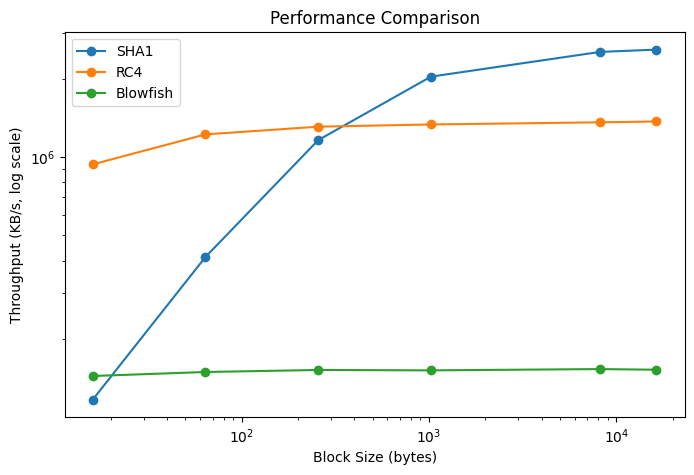

In [111]:
sha1_throughput = [float(e[:-1]) for e in output["SHA1"].splitlines()[-1].split()[1:]] # 1,000 KB/s
rc4_throughput = [float(e[:-1]) for e in output["RC4"].splitlines()[-1].split()[1:]] # 1,000 KB/s
blowfish_throughput = [float(e[:-1]) for e in output["Blowfish"].splitlines()[-1].split()[1:]] # 1,000 KB/s

sizes = [16, 64, 256, 1024, 8192, 16384] # bytes

plt.figure(figsize=(8,5))
plt.plot(sizes, sha1_throughput, marker="o", label="SHA1")
plt.plot(sizes, rc4_throughput, marker="o", label="RC4")
plt.plot(sizes, blowfish_throughput, marker="o", label="Blowfish")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Block Size (bytes)")
plt.ylabel("Throughput (KB/s, log scale)")
plt.title("Performance Comparison")
plt.legend()
plt.show()

[15124.4, 5387.0]
[19467.7, 5977.1]


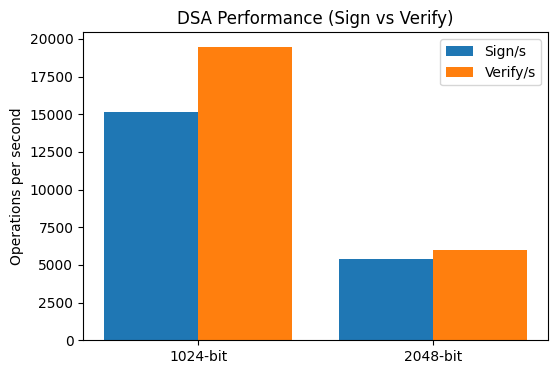

In [122]:
dsa_1024_sign_per_s = [float(e) for e in output["DSA"].splitlines()[-2].split()[5:]] # sign/s
dsa_2048_sign_per_s = [float(e) for e in output["DSA"].splitlines()[-1].split()[5:]] # sign/s
sign = [dsa_1024_sign_per_s[0], dsa_2048_sign_per_s[0]]
verify = [dsa_1024_sign_per_s[1], dsa_2048_sign_per_s[1]]

key_sizes = ["1024-bit", "2048-bit"]

print(sign)
print(verify)

x = range(len(key_sizes))

plt.figure(figsize=(6,4))
plt.bar(x, sign, width=0.4, label="Sign/s")
plt.bar([i+0.4 for i in x], verify, width=0.4, label="Verify/s")
plt.xticks([i+0.2 for i in x], key_sizes)
plt.ylabel("Operations per second")
plt.title("DSA Performance (Sign vs Verify)")
plt.legend()
plt.show()

### <span style="color: red;">Answer (4.b.):</span>

#### SHA1
- ความเร็วสูงมาก โดยเฉพาะเมื่อ block size ใหญ่ ( ประมาณ 2.5 GB/s สำหรับ block size 16384 bytes)
- ปัจจุบันถูกพบช่องโหว่ collision แล้ว → ไม่ปลอดภัยสำหรับการใช้งานที่ต้องการความมั่นคง

#### RC4
- ความเร็วสูงมาก สลับกันเป็นอันดับ 1 และ 2 กับ SHA1 ขึ้นอยู่กับ block size
- ไม่ปลอดภัยแล้ว (มี bias ใน keystream, ถูกห้ามใช้ใน TLS, Wi-Fi)

#### Blowfish
- ช้ากว่า SHA1/RC4 มาก (~150 MB/s)
- ปลอดภัยกว่า RC4 และ SHA1
- ข้อจำกัด: block size 64-bit ทำให้ไม่เหมาะกับข้อมูลขนาดใหญ่ 
- ปัจจุบันนิยมเปลี่ยนไปใช้ AES แทน

#### DSA
- วัดผลในรูปแบบจำนวนครั้งต่อวินาที (ops/s) ไม่ใช่ throughput
- เมื่อเปรียบเทียบกับ symmetric crypto (SHA1/RC4/Blowfish) ถือว่าช้ามาก
- 1024-bit: เลิกใช้แล้ว ไม่ปลอดภัย 
- 048-bit: ยังปลอดภัย แต่ช้ากว่า และถูกแทนที่ด้วย ECDSA/EdDSA
- ใช้สำหรับลายเซ็นดิจิทัล ไม่ใช่สำหรับเข้ารหัส bulk data

#### สรุป
- **RC4**: เร็วที่สุด แต่ **ไม่ปลอดภัย**  
- **SHA1**: เร็วมาก แต่ **ถูกโจมตีได้แล้ว**  
- **Blowfish**: ช้ากว่า แต่ปลอดภัยกว่าสองตัวแรก อย่างไรก็ตามถือว่า **ล้าสมัย**  
- **DSA**: ช้าที่สุด (หลายพัน ops/s เทียบกับ symmetric ที่วัดได้เป็น GB/s) แต่ใช้ในงาน **digital signature** ซึ่งมีวัตถุประสงค์ต่างออกไป  

## c. Explain the mechanism underlying Digital Signature. How does it combine the strength and weakness of each encryption scheme?

#### <span style="color: red;">Answer (4.c.):</span>
**การสร้างลายเซ็น (Signing)**:
- ผู้ส่ง (Sender) มี public/private key pair
- ข้อความ (Message) ถูก Hash เพื่อสร้าง message digest
- message digest ถูกเข้ารหัสด้วย private key ของผู้ส่ง -> digital signature

**การตรวจสอบลายเซ็น (Verification)**:
- ผู้รับ (Receiver) ได้รับข้อความและ digital signature
- ผู้รับทำ Hash ข้อความอีกครั้งด้วยฟังก์ชันเดียวกัน
- ผู้รับถอดรหัส digital signature ด้วย public key ของผู้ส่ง -> ได้ message digest ที่ผู้ส่งสร้าง
- เปรียบเทียบ message digest ที่ผู้รับสร้างกับที่ถอดรหัสได้
- ถ้าตรงกัน
    - แสดงว่าข้อความไม่ถูกแก้ไข (Integrity)
    - ยืนยันว่ามาจากผู้ส่งจริง (Authentication)
    - ผู้ส่งไม่สามารถปฏิเสธได้ว่าไม่ได้ส่งข้อความนั้น (Non-repudiation)

**Strengths/Weaknesses**:
- Symmetric crypto (เช่น AES, Blowfish)
    - **Strength**: เร็ว, เหมาะกับข้อมูลขนาดใหญ่
    - **Weakness**: ต้องมีการแลกเปลี่ยนกุญแจลับ (key) อย่างปลอดภัย
- Asymmetric crypto (เช่น DSA, RSA)
    - **Strength**: ไม่ต้องแลกเปลี่ยนกุญแจลับ ใช้ public key ได้เลย
    - **Weakness**: ช้ามาก, ไม่เหมาะกับข้อมูลขนาดใหญ่

**Combination**:
    - ไม่ได้เข้ารหัสข้อความทั้งฉบับ (ช้า)
    - เข้ารหัสแค่ Message Digest (เล็กมาก, เร็ว)
    - Message จริง ส่งตรง ๆ ได้ (เร็ว)

**Conclusion**:
    - Digital Signature = Hash (เร็ว) + Asymmetric Crypto (ปลอดภัย)
    - ได้ ความถูกต้องของข้อมูล (Integrity), การยืนยันตัวตน (Authentication) และ การปฏิเสธไม่ได้ (Non-repudiation)
    - ดึงจุดแข็ง เลี่ยงจุดอ่อน


# Chayanin Kongsareekul 6532035021